In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("fake_or_real_news.csv")

In [3]:
data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data["text"]=data["text"].str.lower()

In [5]:
text_data=data["text"]

In [6]:
text_data.head(5)

0    daniel greenfield, a shillman journalism fello...
1    google pinterest digg linkedin reddit stumbleu...
2    u.s. secretary of state john f. kerry said mon...
3    — kaydee king (@kaydeeking) november 9, 2016 t...
4    it's primary day in new york and front-runners...
Name: text, dtype: object

In [7]:
vectorizer=TfidfVectorizer(max_features=1000)

In [25]:
type(text_data)

pandas.core.series.Series

In [8]:
X=vectorizer.fit_transform(text_data)

In [9]:
X

<6335x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1112049 stored elements in Compressed Sparse Row format>

In [10]:
data.replace({"label":{"REAL":1,"FAKE":0}},inplace=True)

In [11]:
data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journalism fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",0
4,875,The Battle of New York: Why This Primary Matters,it's primary day in new york and front-runners...,1


In [12]:
Y=data["label"]

In [13]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35)

In [30]:
X.shape

(6335, 1000)

In [31]:
x_train.shape

(4117, 1000)

In [16]:
from tensorflow.keras import layers,models

In [17]:
model = models.Sequential()


model.add(layers.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(layers.Dropout(0.5)) 

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')


model.fit(x_train, y_train, epochs=10, batch_size=32,validation_data=(x_test,y_test))


C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6717 - val_loss: 0.3440
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3369 - val_loss: 0.2584
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2238 - val_loss: 0.2448
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1829 - val_loss: 0.2455
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1652 - val_loss: 0.2412
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1246 - val_loss: 0.2617
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0980 - val_loss: 0.2654
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0723 - val_loss: 0.2940
Epoch 9/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0646 - val_loss: 0.3197
Epoch 10/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0488 - val_loss: 0.3267


In [18]:
history_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

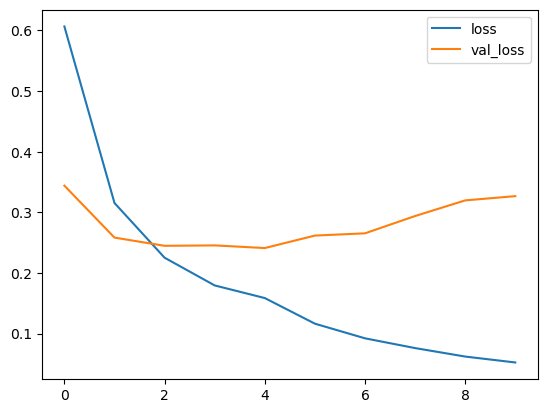

In [19]:
history_df.plot(kind="line")

In [43]:
def predict(feature):
    feature=feature.lower()
    feature_vec=vectorizer.transform([feature])
    ans=model.predict(feature_vec)
    if ans>=0.5:
        ans="REAL"
    else:
        ans="FAKE"
    print(ans)